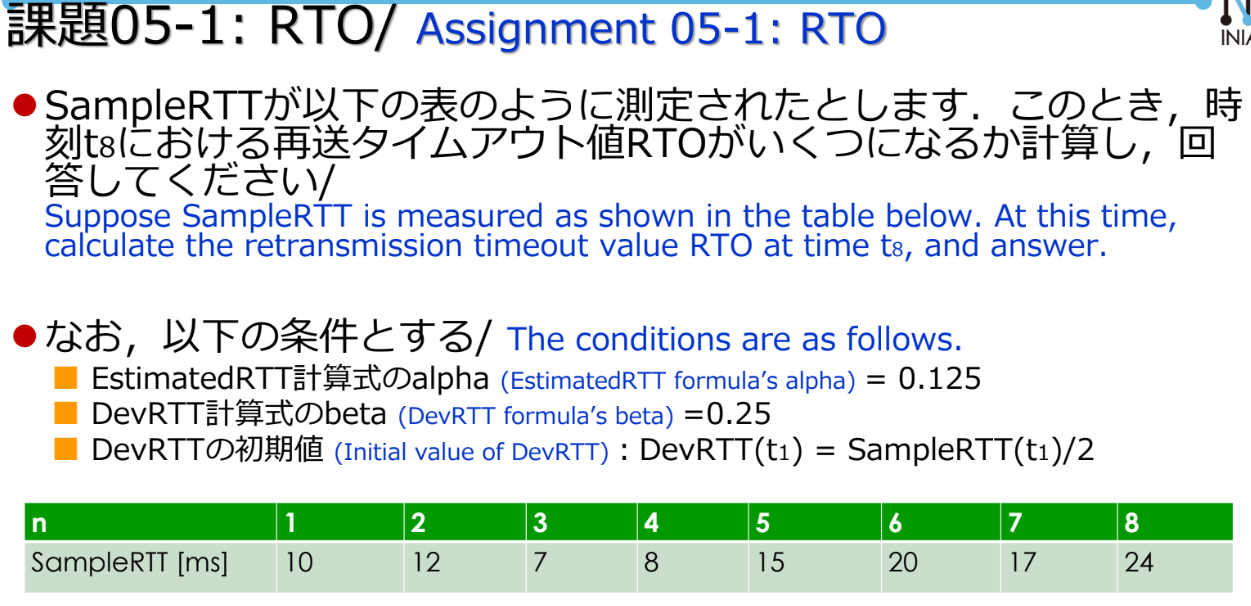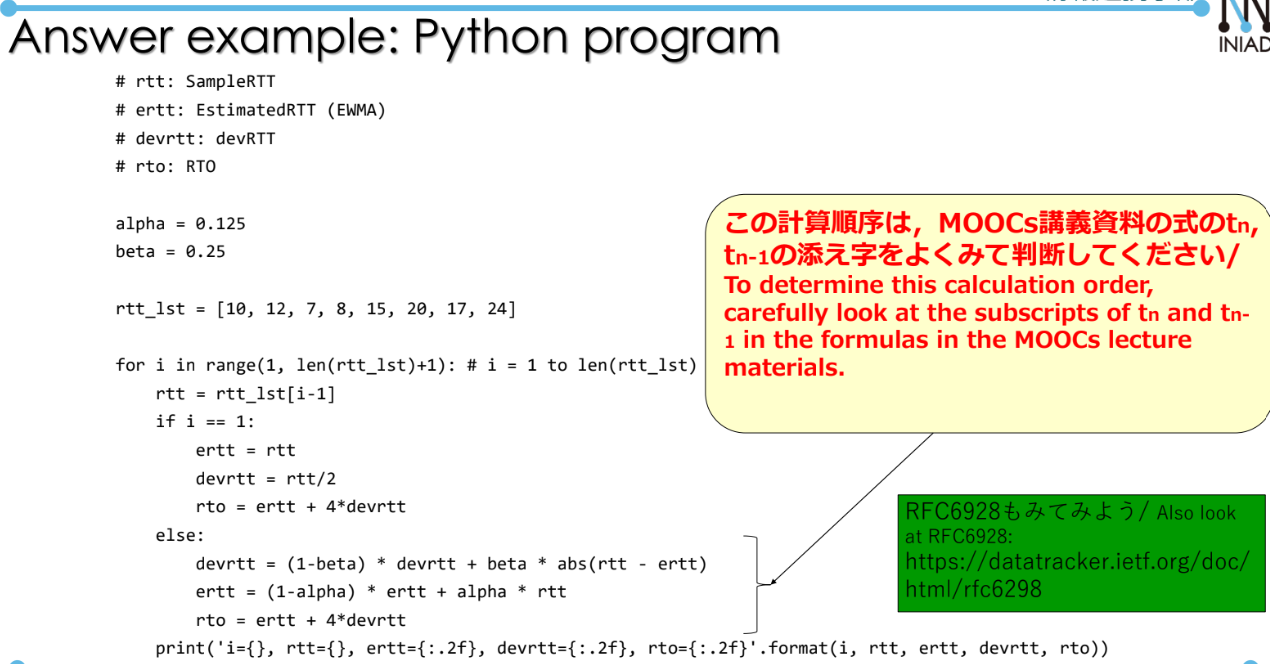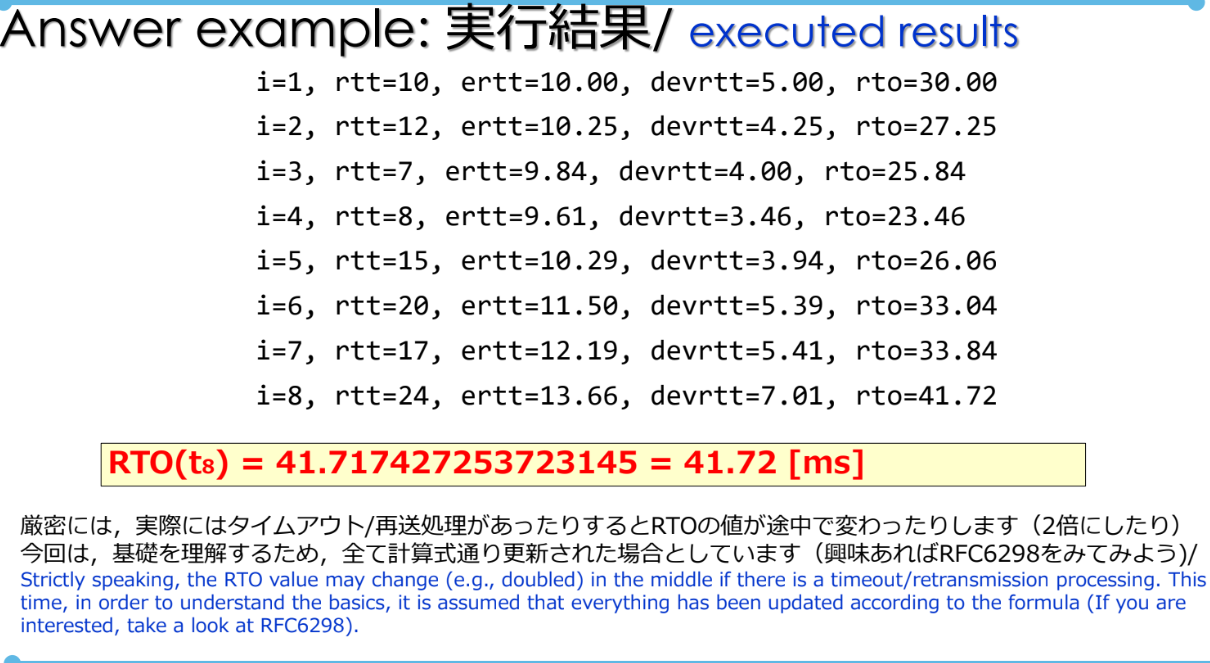

# コード(Answer exampleは一番下にあります)

In [ ]:
alpha = 0.125
beta = 0.25
sampleRTT = [10, 12, 7, 8, 15, 20, 17, 24]
#推定RTTの初期値を設定,DevRTTの初期値は問題文で仮定
estimatedRTT = sampleRTT[0]
devRTT = sampleRTT[0] / 2
#sampleRTTの数だけforループを行い、推定RTTとDevRTTを更新
for i in range(1, len(sampleRTT)):
    devRTT = (1 - beta) * devRTT + beta * abs(sampleRTT[i] - estimatedRTT)
    estimatedRTT = (1 - alpha) * estimatedRTT + alpha * sampleRTT[i]
#最新の推定RTTとDevRTTを使ってRTOを求める
RTO = estimatedRTT + 4 * devRTT
print("RTO at t8:", RTO)

# 該当スライド

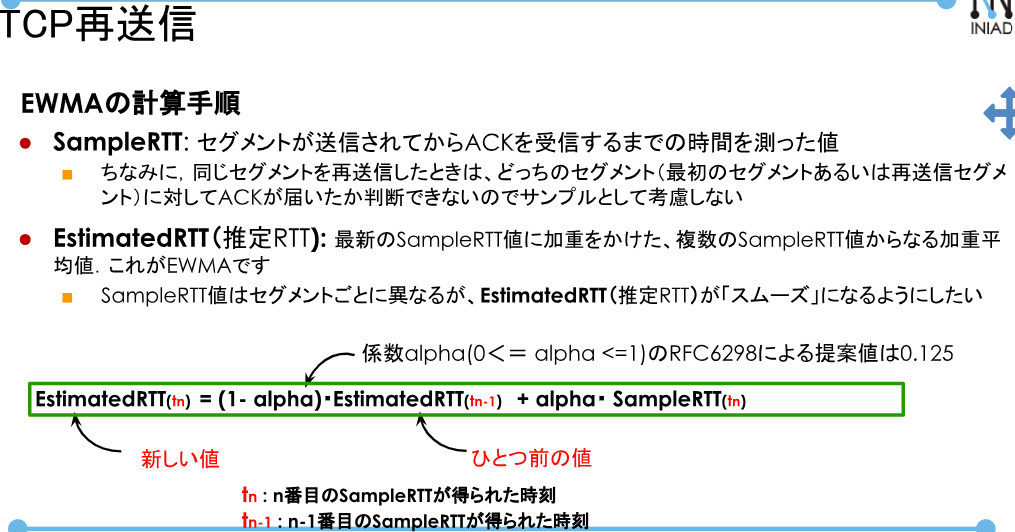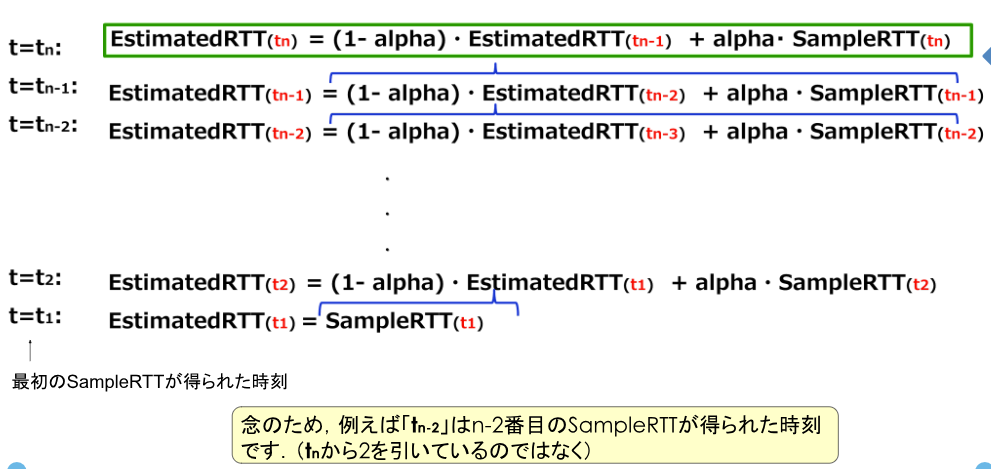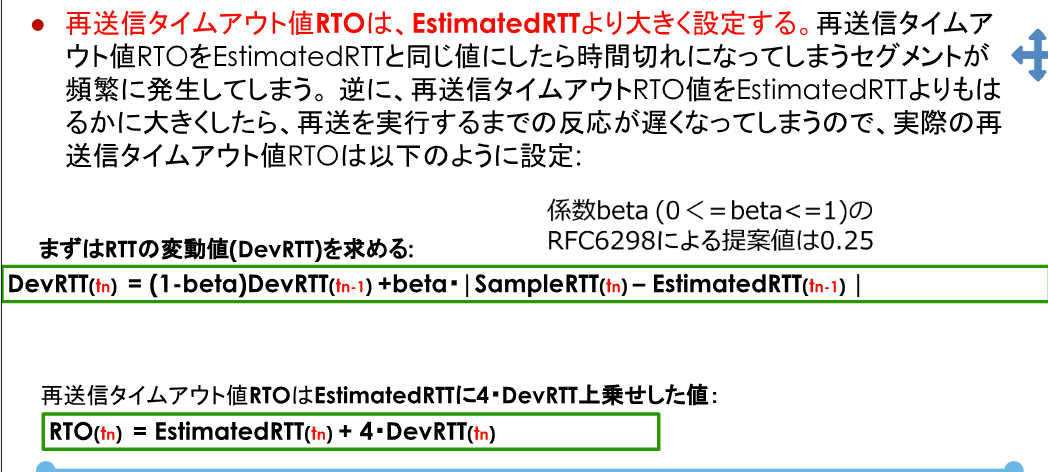

In [ ]:
# rtt: SampleRTT
# ertt: EstimatedRTT (EWMA)
# devrtt: devRTT
# rto: RTO

alpha = 0.125
beta = 0.25

rtt_lst = [10, 12, 7, 8, 15, 20, 17, 24]

for i in range(1, len(rtt_lst)+1): # i = 1 to len(rtt_lst):
    rtt = rtt_lst[i-1]
    if i == 1:
        ertt = rtt
        devrtt = rtt/2
        rto = ertt + 4*devrtt
    else:
        devrtt = (1-beta) * devrtt + beta * abs(rtt - ertt)
        ertt = (1-alpha) * ertt + alpha * rtt
        rto = ertt + 4*devrtt
    print('i={}, rtt={}, ertt={:.2f}, devrtt={:.2f}, rto={:.2f}'.format(i, rtt, ertt, devrtt, rto))

#i=3, rtt=7, ertt=9.84, devrtt=4.00, rto=25.84
#i=4, rtt=8, ertt=9.61, devrtt=3.46, rto=23.46
#i=5, rtt=15, ertt=10.29, devrtt=3.94, rto=26.06
#i=6, rtt=20, ertt=11.50, devrtt=5.39, rto=33.04
#i=7, rtt=17, ertt=12.19, devrtt=5.41, rto=33.84
#i=8, rtt=24, ertt=13.66, devrtt=7.01, rto=41.72 